In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('infolimpioavanzadoTarget.csv')

In [3]:
print(df.head())

         date       open       high        low      close   adjclose  volume  \
0  2022-01-03  17.799999  18.219000  17.500000  17.760000  17.760000  106600   
1  2022-01-04  17.700001  18.309999  17.620001  17.660000  17.660000  128700   
2  2022-01-05  17.580000  17.799999  16.910000  16.950001  16.950001  103100   
3  2022-01-06  16.650000  16.879999  16.139999  16.170000  16.170000  173600   
4  2022-01-07  16.219999  16.290001  15.630000  15.710000  15.710000  137800   

  ticker  RSIadjclose15  RSIvolume15  ...  high-15  K-15  D-15  \
0   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
1   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
2   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
3   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
4   ASLE            NaN          NaN  ...      NaN   NaN   NaN   

   stochastic-k-15  stochastic-d-15  stochastic-kd-15  volumenrelativo  \
0              NaN              NaN             

In [4]:
print(df.describe())

              open         high          low        close     adjclose  \
count  7781.000000  7781.000000  7781.000000  7781.000000  7781.000000   
mean     34.990220    35.655999    34.301243    34.964414    34.483147   
std      99.841502   101.451058    98.073945    99.790823    98.603879   
min       0.410000     0.435000     0.405000     0.408000     0.408000   
25%       4.050000     4.130000     3.980000     4.030000     3.960000   
50%      10.080000    10.110000    10.005000    10.080000    10.061000   
75%      24.350000    24.500000    24.080000    24.250000    22.466007   
max     795.739990   799.359985   784.960022   797.489990   783.376221   

             volume  RSIadjclose15  RSIvolume15  RSIadjclose25  RSIvolume25  \
count  7.781000e+03    7316.000000  7316.000000    7006.000000  7006.000000   
mean   7.586022e+05      46.817434    49.814790      46.966016    49.898659   
std    3.934491e+06      11.672838     5.002664       8.760961     3.420371   
min    0.000000e+

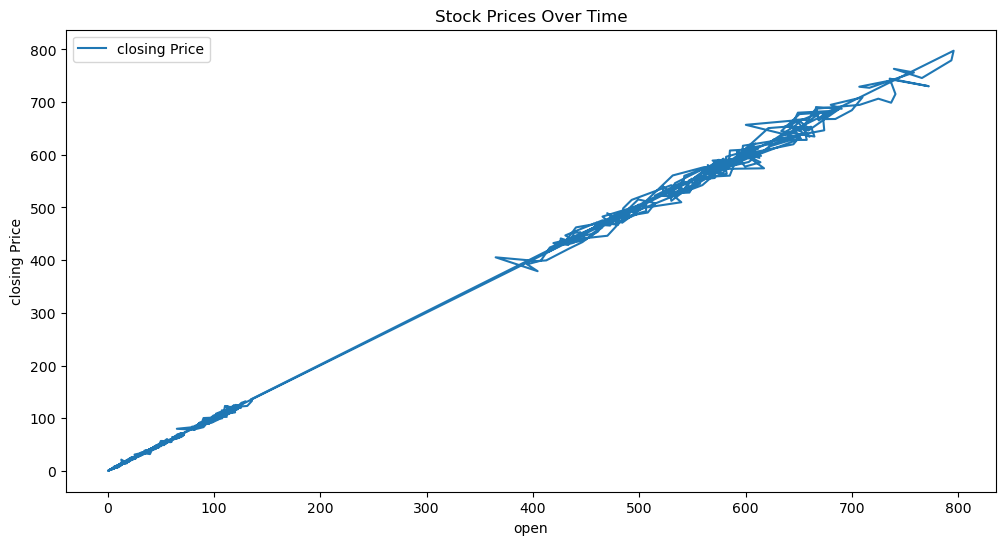

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df['open'], df['close'], label='closing Price')
plt.title('Stock Prices Over Time')
plt.xlabel('open')
plt.ylabel('closing Price')
plt.legend()
plt.show()

In [7]:
df['Previous_Close'] = df['close'].shift(1)

In [8]:
df = df.dropna()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df[['Previous_Close']], df['close'], test_size=0.2, random_state=42)


In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
predictions = model.predict(X_test)

In [13]:
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 8.86881993418995
